In [4]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.1 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [5]:
from sklearn.datasets import make_moons, make_circles, make_classification, make_regression

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.lines as mlines


from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsClassifier

from ipywidgets import interact

sns.set()

### Funciones Auxiliares

Usaremos estas funciones para ver los resultados de nuestros experimentos

In [6]:
def pintar_datos_clasificacion(X_train, y_train, X_test, y_test):
    sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', palette=['c','y'], s=80, label='train', legend=False)
    sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test, marker='*', palette=['c','y'], s=200, label='test', legend=False)
    circle = mlines.Line2D([], [], linestyle='None', color='black', marker='o', label='train', markersize=7)
    star = mlines.Line2D([], [], linestyle='None', color='black', marker='*', label='test', markersize=7)
    legend1 = plt.legend(title='Particiones', handles=[circle, star], loc=1)
    class_0 = mlines.Line2D([], [], color='c', marker='s', linestyle='None', markersize=7, label='0')
    class_1 = mlines.Line2D([], [], color='y', marker='s', linestyle='None', markersize=7, label='1')
    legend2 = plt.legend(title='Clases', handles=[class_0, class_1], loc=2)
    plt.gca().add_artist(legend1)
    plt.title('Train and test split');
    
    
def pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred):
    plt.figure()
    sns.scatterplot(x=X_train,y=y_train, marker='o', color='c', edgecolor='none', s=80, label = 'Valores de train');
    index_train = np.argsort(X_train)
    plt.plot(X_train[index_train],y_train_pred[index_train], color='lightcoral', label='Predicción de la regresión');
    plt.plot(X, y_real, color='green', linewidth=3, label='Función real',alpha=0.2);    
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
    plt.title('Datos de train');

    plt.figure()
    sns.scatterplot(x=X_test,y=y_test, marker='*', color='y', edgecolor='none', s=200, label = 'Valores de test');
    index = np.argsort(X_test)
    plt.plot(X_test[index],y_test_pred[index], color='lightcoral', label='Predicción de la regresión');
    plt.plot(X, y_real, color='green', linewidth=3, label='Función real',alpha=0.2);
    plt.title('Datos de test');
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');



def pintar_resultados_clasificacion(X_train, y_train, X_test, y_test):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title('Valores reales Train')
    sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train, marker='o', s=80, palette=['c','y'])
    plt.legend(title='Clases');
    plt.subplot(1,2,2)
    plt.title('Predicciones Train')
    sns.scatterplot(x=X_train[:,0], y=X_train[:, 1], hue=y_train_pred, marker='o', s=80, palette=['c','y'])
    plt.legend(title='Clases');

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.title('Valores reales Test')
    sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test, marker='*', s=200, palette=['c','y'])
    class_0 = mlines.Line2D([], [], color='c', marker='*', linestyle='None', markersize=7, label='0')
    class_1 = mlines.Line2D([], [], color='y', marker='*', linestyle='None', markersize=7, label='1')
    plt.legend(title='Clases', handles=[class_0, class_1], loc="upper right")

    plt.subplot(1,2,2)
    plt.title('Predicciones Test')
    sns.scatterplot(x=X_test[:,0], y=X_test[:, 1], hue=y_test_pred, marker='*', s=200, palette=['c','y'])
    class_0 = mlines.Line2D([], [], color='c', marker='*', linestyle='None', markersize=7, label='0')
    class_1 = mlines.Line2D([], [], color='y', marker='*', linestyle='None', markersize=7, label='1')
    plt.legend(title='Clases', handles=[class_0, class_1], loc="upper right")

# Regresión 

En una regresión queremos predecir la tendencia que siguen los datos. Siendo estos datos variables continuas.  

##  Regresión Lineal

Para ver como funciona la regresión lineal vamos a generar datos sintéticos, así tendremos el valor real que seguiría la función que queremos predecir.

En concreto, vamos a predecir los valores y de la función:

$y = 1 + 0.5x$

Para generar los datos sintéticos usaremos la función base y le añadiremos ruido gausiano. 

In [7]:
N = 50
#noise = 0.4
from ipywidgets import interact, interactive, fixed, interact_manual 

X = np.linspace(0, 10, N);
y_real =  1 + 0.5*X; 

def visualizar_muestras_con_ruido(noise):
    y = 1 + 0.5*X + np.random.normal(0,noise,N) #ruido gaussiano;
    sns.scatterplot(x=X,y=y, label='Muestras', marker='o', color='c', edgecolor='none', s=50);
    plt.plot(X, y_real, color='green', linewidth=3, label='Función Real',alpha=0.2)
    plt.ylim(0,8)
    plt.xlim(0,10)
    plt.legend(loc=2)
    return y 
    
interactive_plot = interactive(visualizar_muestras_con_ruido, noise=(0.0,1.0));
display(interactive_plot)

interactive(children=(FloatSlider(value=0.5, description='noise', max=1.0), Output()), _dom_classes=('widget-i…

Los separamos en train (2/3) y test (1/3)

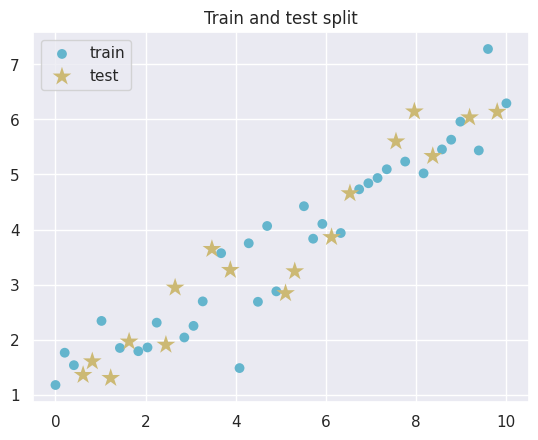

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, interactive_plot.result, test_size=0.33, random_state=42)

sns.scatterplot(x=X_train, y=y_train, marker='o', color='c', edgecolor='none', s=50, label='train')
sns.scatterplot(x=X_test, y=y_test, marker='*', color='y', edgecolor='none', s=200, label='test')
plt.legend()
plt.title('Train and test split');

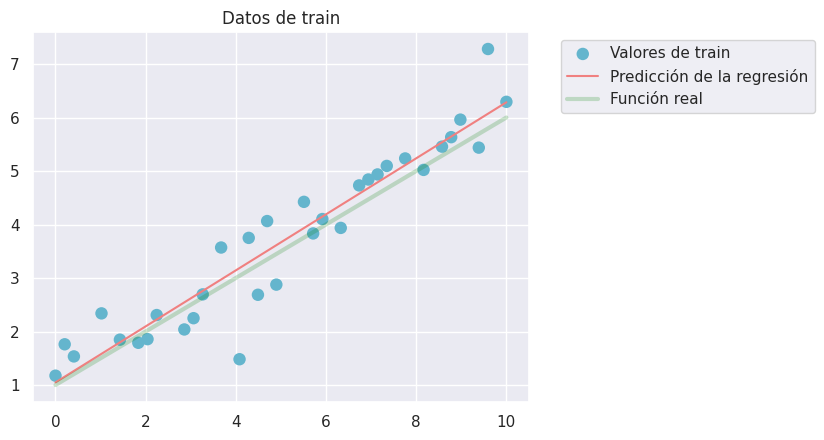

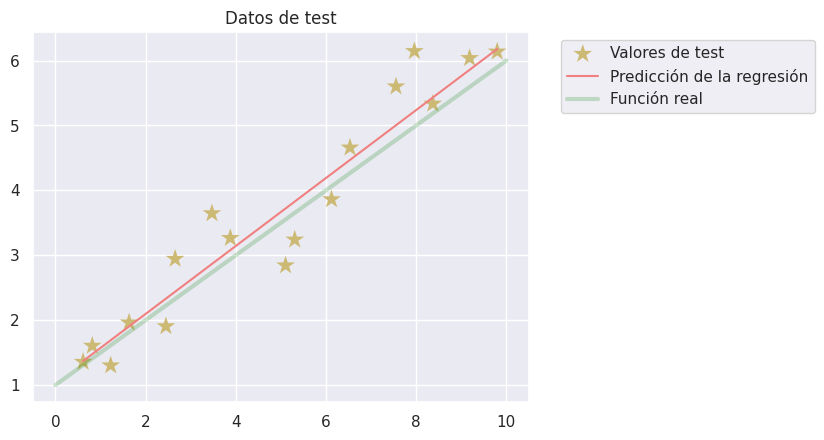

In [9]:
# Declaramos el modelo
lr = LinearRegression()

# Lo entrenamos
lr.fit(X_train.reshape(-1, 1), y_train)

# Pintamos la predicción sobre los datos
y_train_pred = lr.predict(X_train.reshape(-1,1))
y_test_pred = lr.predict(X_test.reshape(-1, 1))
pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)


# <center style='color:lightcoral'> ¡Bien, hemos conseguido buenos resultados! <center>
<img src=confeti.gif width=9000px>


[Image source](https://static.wixstatic.com/media/0f206d_61c24eba71944a58869c4b6f160b2ca1~mv2.gif)


Pero... que pasaría si tenemos datos no lineales?

Vamos a generar datos sintéticos no lineales para ver que pasa.

Esta vez siguiendo la función $y=sin(x)$

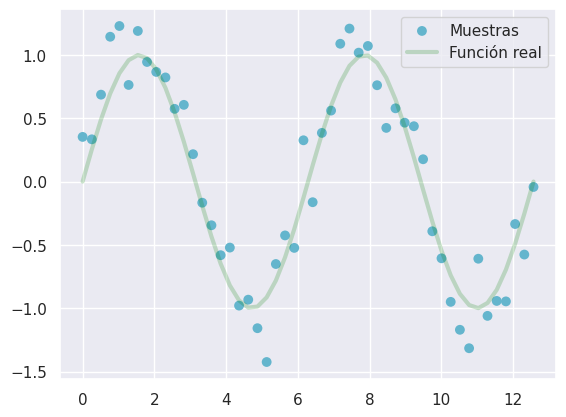

In [10]:
N = 50 # number of data points
noise = 0.2

X = np.linspace(0, 4*np.pi, N)
y_real = np.sin(X) 

np.random.seed(0) 
y =np.sin(X)  + np.random.normal(0,noise,N)
sns.scatterplot(x=X, y=y, label='Muestras', marker='o', color='c', edgecolor='none', s=50);
plt.plot(X, y_real, color='green', linewidth=3, label='Función real',alpha=0.2);
plt.legend();



Separamos los datos en train (2/3) y test (1/3).

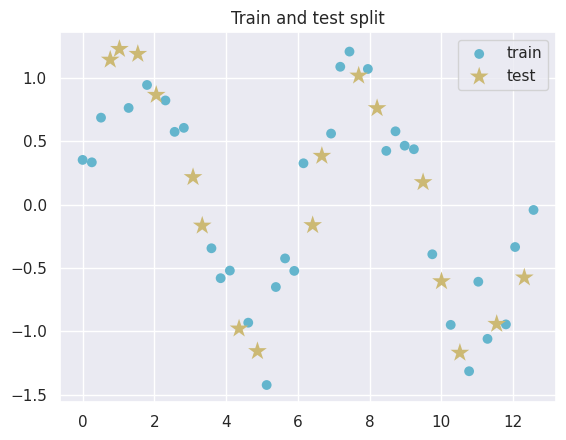

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#print(X_train.shape, X_test.shape)
sns.scatterplot(x=X_train, y=y_train, marker='o', color='c', edgecolor='none', s=50, label='train')
sns.scatterplot(x=X_test, y=y_test, marker='*', color='y', edgecolor='none', s=200, label='test')
plt.legend();
plt.title('Train and test split');

Entrenamos el modelo con los datos nuevos y predecimos el resultado.

Mean squared error:  0.5199860809712906


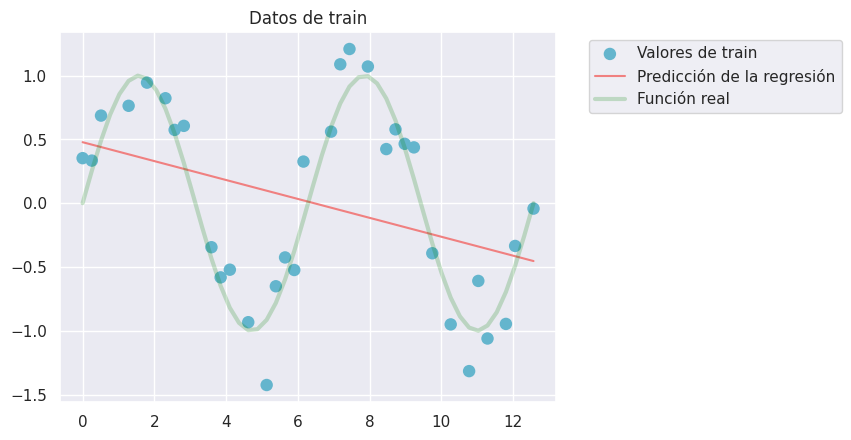

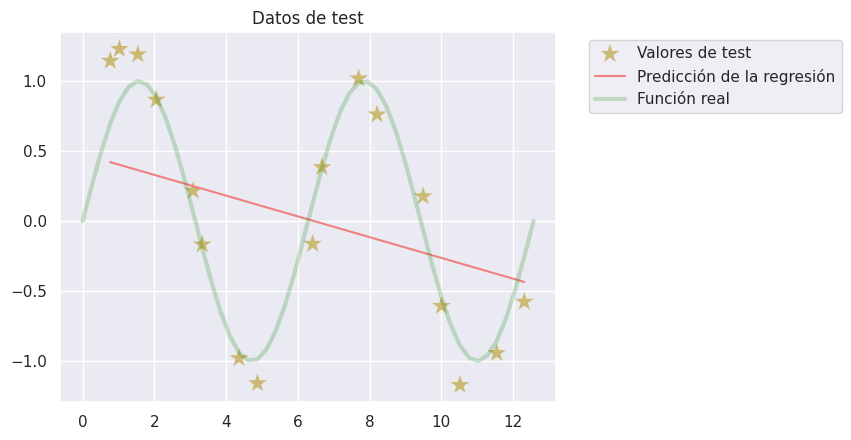

In [12]:
# Declaramos el modelo
lr = LinearRegression()

# Lo entrenamos
lr.fit(X_train.reshape(-1, 1), y_train)

# Pintamos la predicción sobre los datos
y_train_pred = lr.predict(X_train.reshape(-1, 1))

y_test_pred = lr.predict(X_test.reshape(-1, 1))

print('Mean squared error: ', mean_squared_error(y_test, y_test_pred))

pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)

Los resultados no son tan buenos...


## Regresión polinómica

La regresión lineal no es suficientemente compleja como para poder predecir los datos de nuestra función. Necesitamos maquinaria más potente. 

Para solucionar este problema vamos a utilizar una regresión polinómica. O lo que es lo mismo: vamos a aplicar una transformación polinómica a nuestros datos y luego vamos a aplicar una regresión lineal sobre los datos transformados. 

$Transformación(x) = \hat{x} = constante + x + x^2 + x^3 + ... x^{n - 1}$

$Regresión\_lineal(\hat{x}) = Regresión\_lineal(x + x^2 + x^3 + ... x^{n-1}) = Regresión\_polinómica(x)$ 

In [13]:
def prediccion(n=1):
    poli_transform = PolynomialFeatures(n)
    X_poli_train = poli_transform.fit_transform(X_train.reshape(-1, 1))
    X_poli_test = poli_transform.transform(X_test.reshape(-1, 1))

    model =  LinearRegression()

    model.fit(X_poli_train, y_train)

    y_train_pred = model.predict(X_poli_train)
    y_test_pred = model.predict(X_poli_test)
    pintar_resultados_regresion(X,y_real, X_train,y_train_pred,X_test,y_test_pred)
    print('Mean squared error:', mean_squared_error(y_test, y_test_pred))


    
interactive_plot = interactive(prediccion, n=(0,10,1));
display(interactive_plot)

interactive(children=(IntSlider(value=1, description='n', max=10), Output()), _dom_classes=('widget-interact',…

* Un polinómio de grado **n** aproxima bastante bien nuestra función. ¿Cuál creéis que es? Podéis votar [aquí](https://www.menti.com/62jarbciy7).

# Clasificación

Ahora vamos a ver como trabajaríamos con un problema de clasificación. 

Esta vez nuestros datos van a tener dos dimensiones. 

## Regresión Logística

A pesar de su nombre, la regresión logística es un modelo de clasificación. 

Este modelo es muy parecido a la regresión lineal.

La única diferencia es que al resultado de la regresión lineal le aplicamos una función sigmoide. De esta forma, a partir de un resultado continuo obtenemos dos clases. 

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1280px-Logistic-curve.svg.png width="450">

### Con unos datos fáciles

Esta vez vamos a intentar clasificar unos datos linealmente separables. 

Este tipo de datos no son comunes en la vida real, pero lo vamos a utilizar como ejemplo. 

Estos datos tienen dos dimensiones, cada punto tendrá un valor para el eje horizontal y otro para el eje vertical.

Cada punto corresponderá con una clase, esta clase va a ser lo que queremos predecir.

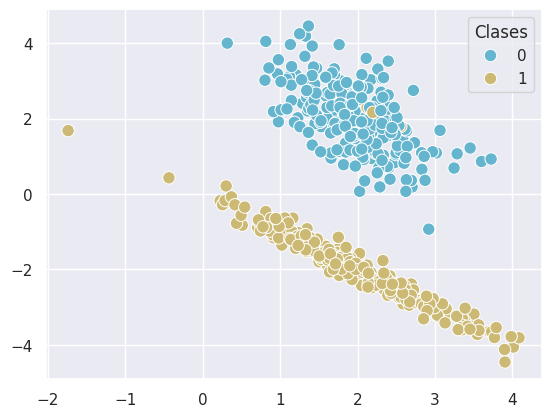

In [14]:
N_SAMPLES = 500
NOISE = 0
N_VARIABLES = 2

X, y = make_classification(n_samples=N_SAMPLES, n_features=N_VARIABLES, n_redundant=0, n_informative=N_VARIABLES,
                               random_state=1, n_clusters_per_class=1, class_sep=2-NOISE)

#print(X[:4], y[:4])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, marker='o', palette=['c','y'], s=80);
plt.legend(title='Clases');

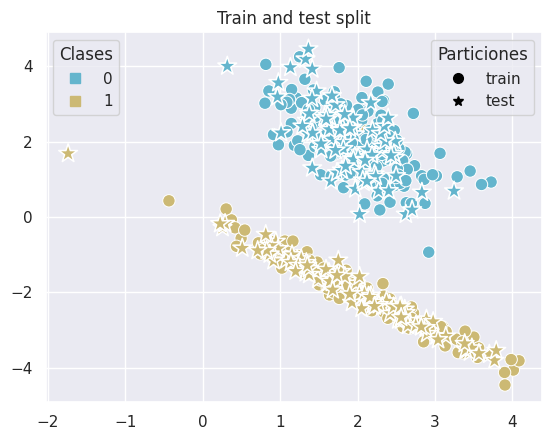

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pintar_datos_clasificacion(X_train, y_train, X_test, y_test)

Si utilizamos una regresión logística para clasificar este tipo de datos vemos un muy buen resultado.

¡Nuestro modelo ha acertado para todas las muestras!

Ahora vamos a ver que pasa si añadimos ruido a los datos. ¿Funciona igual de bien?

Prediction Accuracy: 1.0


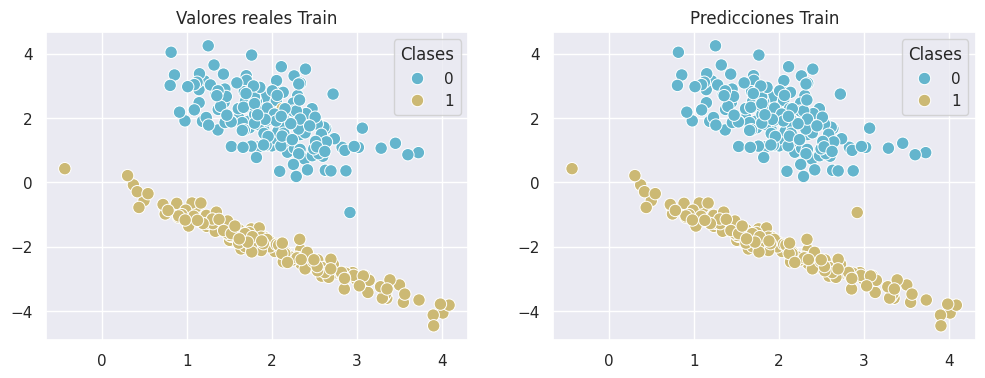

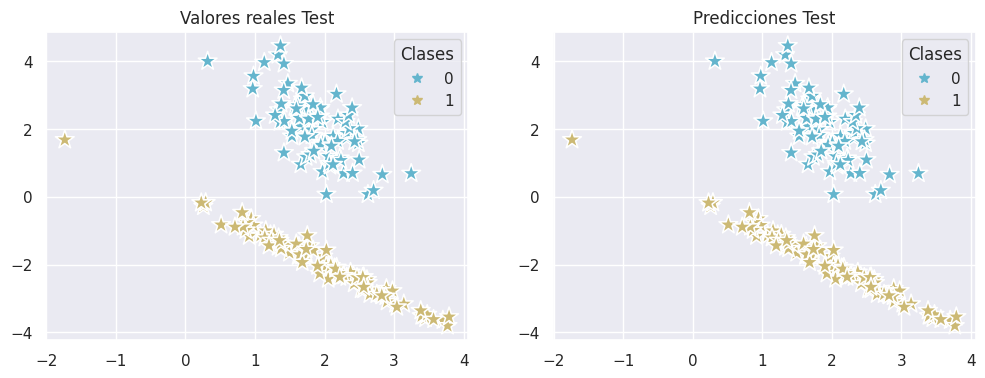

In [16]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

### Con datos un poco más difíciles

Vamos a probar que pasa con unos datos un poco más complicados.

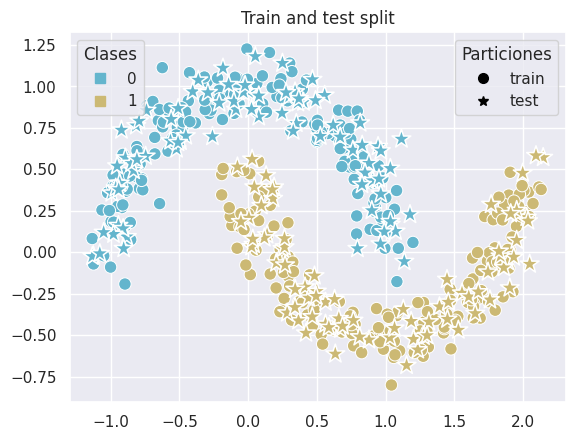

In [17]:
ruido = 0.1

X, y= make_moons(n_samples=N_SAMPLES, noise=ruido, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pintar_datos_clasificacion(X_train, y_train, X_test, y_test)

Pues no tenemos tan buenos resultados. 

Esto pasa por que estamos intentando clasificar dos grupos no linealmente separables con un modelo lineal. 

Prediction Accuracy: 0.8787878787878788


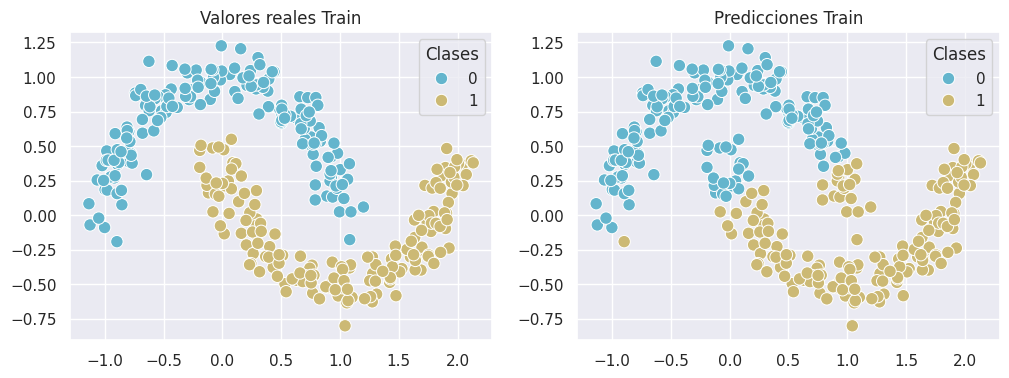

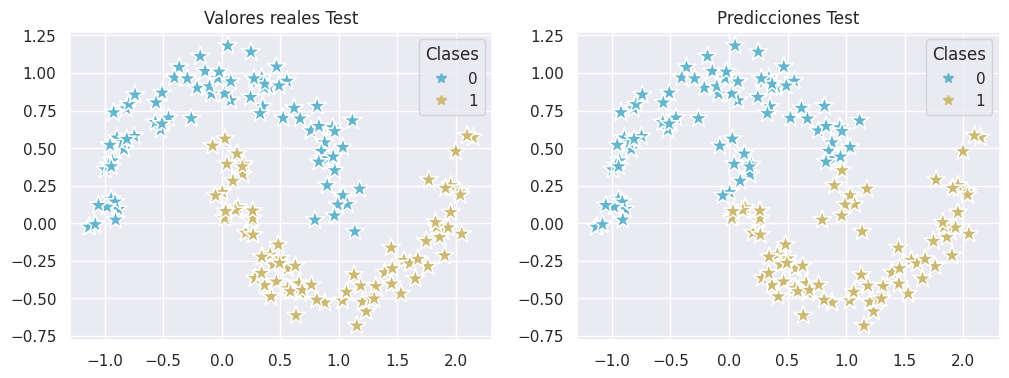

In [18]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Y con unos datos aun más complicados? 

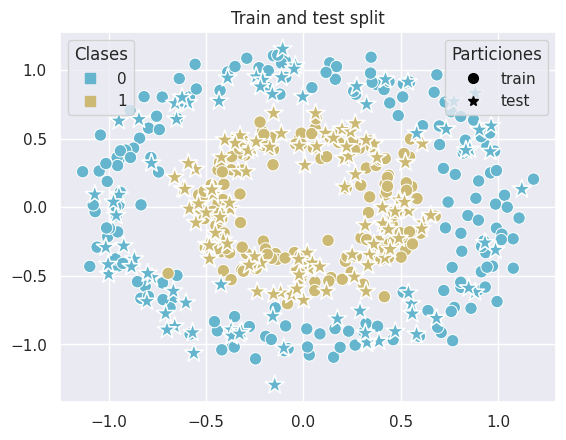

In [19]:
X, y= make_circles(n_samples=N_SAMPLES, noise=ruido, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pintar_datos_clasificacion(X_train, y_train, X_test, y_test)

Pues tenemos un desastre.

Prediction Accuracy: 0.3090909090909091


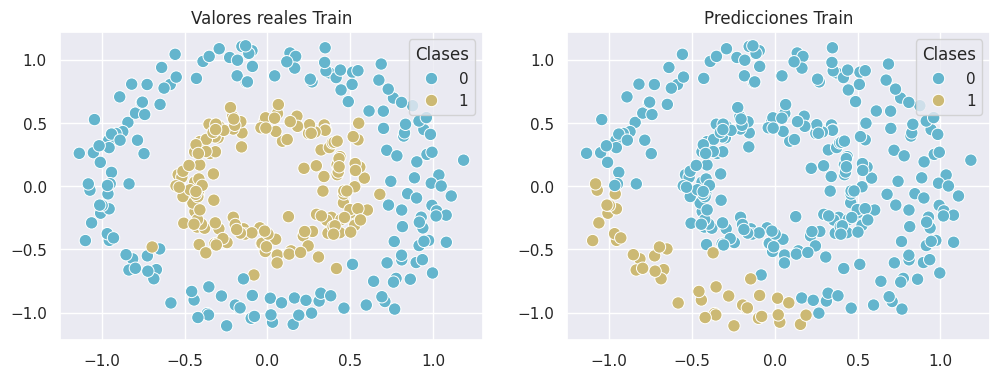

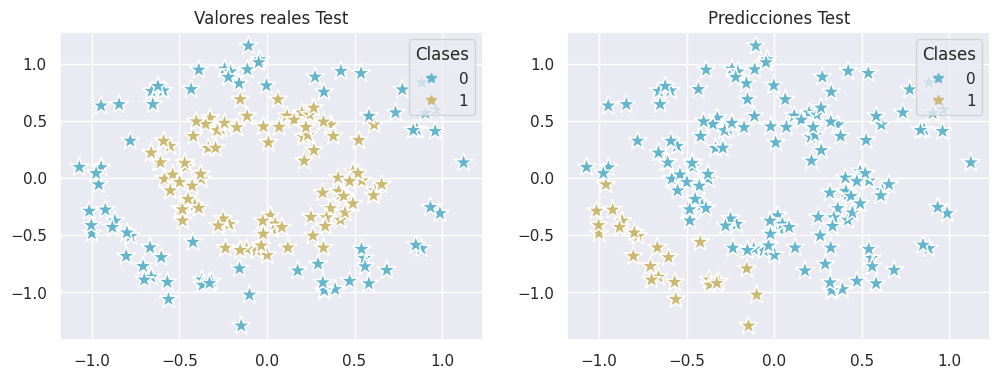

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Para datos no linealmente separables vamos a tener que: 
* Transformarlos no linealmente, como hicimos en el ejemplo de regresión.
* Utilizar un modelo no lineal. 

Ahora vamos a ver como se comportaría un modelo no lineal. 

## K-Nearest Neighbors(KNN)

Para clasificar una muestra por knn se busca las k muestras más parecidas a esta y se le asigna la clase más común dentro de estas muestras.

Para este caso concreto mediremos como de parecidas son dos muestras utilizando la distancia euclídea, pero el concepto de "parecido" se puede definir como queramos.

<img src=knn.gif width=500px>

[Image source](https://www.newtechdojo.com/k-nearest-neighbor-algorithm/)

Prediction Accuracy: 1.0


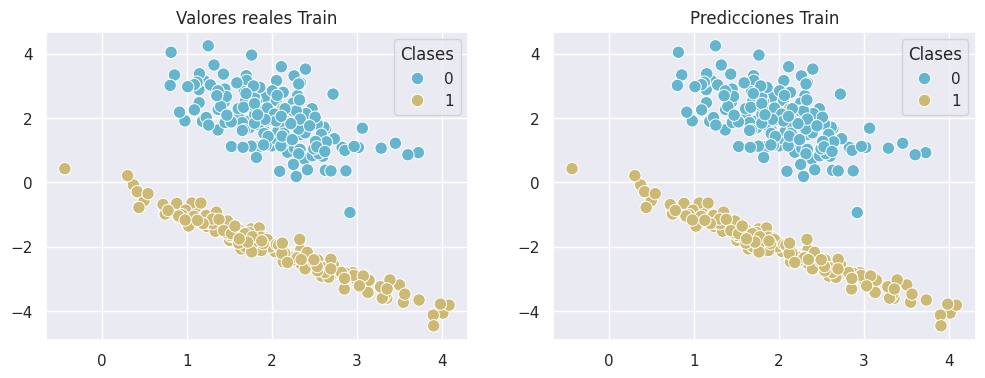

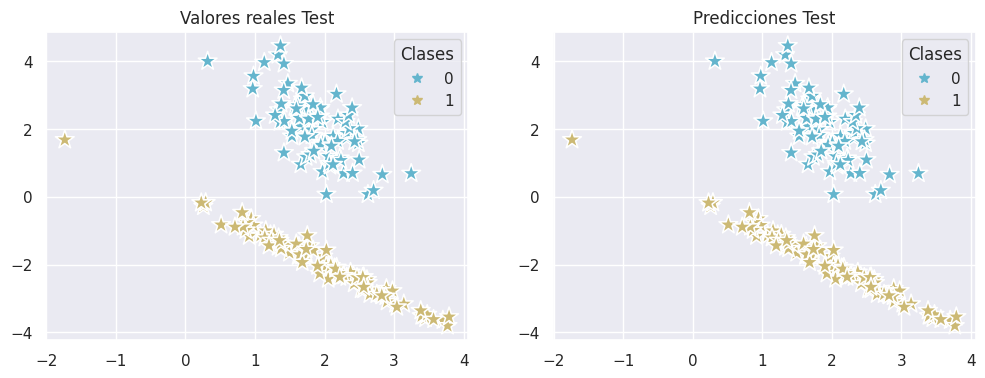

In [21]:
X, y = make_classification(n_samples=N_SAMPLES, n_features=N_VARIABLES, n_redundant=0, n_informative=N_VARIABLES,
                               random_state=1, n_clusters_per_class=1, class_sep=2-NOISE)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Prediction Accuracy: 1.0


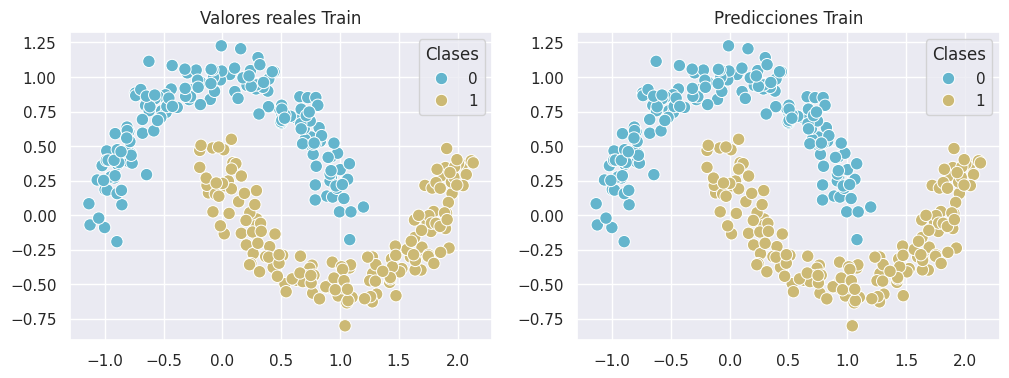

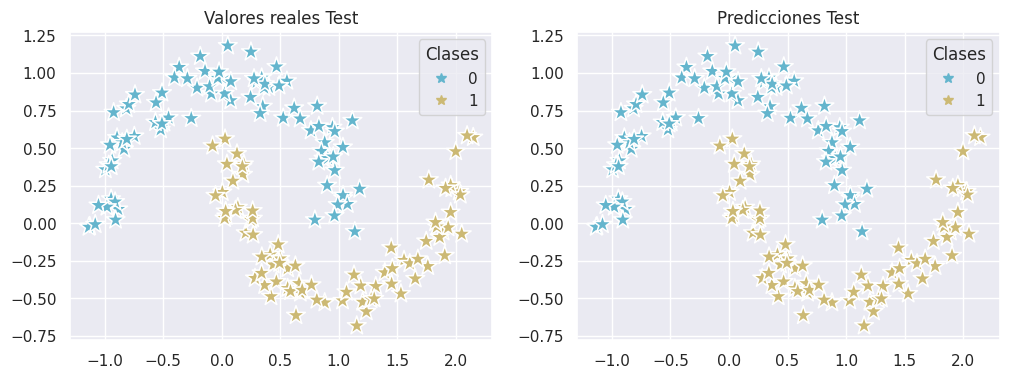

In [22]:
ruido = 0.1

X, y= make_moons(n_samples=N_SAMPLES, noise=ruido, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

Prediction Accuracy: 0.9757575757575757


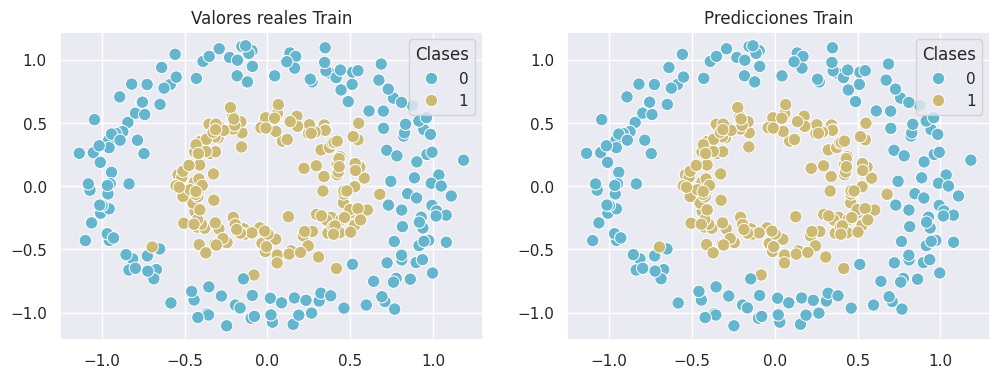

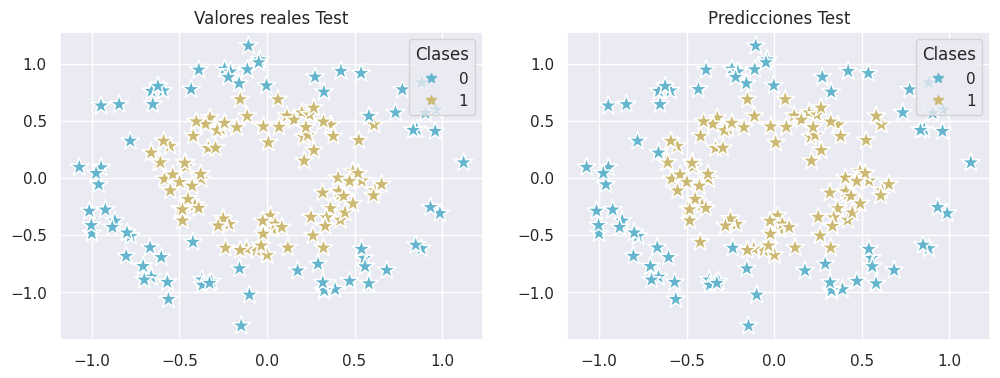

In [23]:
X, y= make_circles(n_samples=N_SAMPLES, noise=ruido, factor=0.5, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


knn = KNeighborsClassifier(n_neighbors=1, )
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

pintar_resultados_clasificacion(X_train, y_train, X_test, y_test)

En estos ejemplos hemos trabajado con datos de juguete. Son datos pequeños de los cuales nosotros conocemos la verdadera clase o distribución de las muestras.
En el mundo real esto no pasa. Generalmente, no vamos a saber la verdad que se oculta de nuestros datos, y generalmente los datos van a ser más complicados.

¿Qué pasa si queremos clasificar imágenes? ¿Qué pasa si queremos clasificar texto? Estos datos son mucho más complicados y necesitan más potencia de computación. En la sesión siguiente hablaremos de como se puede utilizar un supercomputador para resolverlos. 

# Pima Diabetes dataset

Predecir si un paciente tiene diabetes a partir de sus datos clínicos. 

In [24]:
import pandas as  pd
import os

pima = pd.read_csv(os.path.expanduser('~/.keras/datasets/diabetes.csv'))
pima.head()

FileNotFoundError: [Errno 2] No such file or directory: '/home/lucia/.keras/datasets/diabetes.csv'

In [21]:
pima_variables = pima.iloc[:,:-1]
pima_objetivo = pima.iloc[:,-1]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(pima_variables, pima_objetivo, test_size=0.33, random_state=42)

In [23]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score = lr.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

Prediction Accuracy: 0.7519685039370079


In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
accuracy_score = knn.score(X_test, y_test)
print('Prediction Accuracy: {}'.format( accuracy_score))

Prediction Accuracy: 0.65748031496063
